# Data Cleaning

Data Cleaning step is formed by 9 steps/sections as follows;
1. <a href='#unnecessary_data_section'><b>Unnecessary Data</b></a>
2. <a href='#duplicate_data_section'><b>Duplicate Data</b></a>
3. <a href='#data_types_section'><b>Data Types</b></a>
4. <a href='#typo_section'><b>Typo</b></a>
5. <a href='#missing_data_section'><b>Missing Data</b></a>
6. <a href='#outlier_section'><b>Outlier</b></a>
7. <a href='#common_proper_terminology_section'><b>Common Proper Terminology</b></a>
8. <a href='#re_naming_section'><b>Re-Name</b></a>
9. <a href='#format_section'><b>Format</b></a>

---

## Data Read

In [2]:
# Import necessary libraries for data obtaining
import pandas as pd

In [4]:
raw_data = pd.read_csv('CO_NOx_Emissions.csv')

---

<a id='unnecessary_data_section'></a>
## 1. Unnecessary Data

Unnecessary data in the dataset is checked and if there is any they are removed from the dataset in this section.

In [5]:
raw_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


There are 11 features in the dataset and explanations of the features are as follows;  
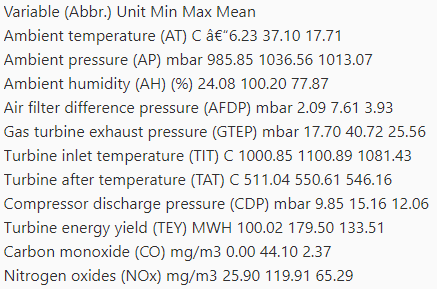

<a id='duplicate_data_section'></a>
## 2. Duplicate Data

Duplicate data in the dataset is checked and if there is any they are removed from the dataset in this section.

In [6]:
# Duplicated data detection
raw_data[raw_data.duplicated(keep=False)]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
26398,23.156,1004.2,95.938,4.0547,24.672,1076.6,549.87,127.01,11.835,1.7056,47.352
26399,23.156,1004.2,95.938,4.0547,24.672,1076.6,549.87,127.01,11.835,1.7056,47.352
26400,23.156,1004.2,95.938,4.0547,24.672,1076.6,549.87,127.01,11.835,1.7056,47.352
26401,23.156,1004.2,95.938,4.0547,24.672,1076.6,549.87,127.01,11.835,1.7056,47.352
26402,23.156,1004.2,95.938,4.0547,24.672,1076.6,549.87,127.01,11.835,1.7056,47.352
27388,26.067,1008.3,87.328,5.0703,29.984,1099.1,546.78,146.14,13.038,1.3163,52.564
27389,26.067,1008.3,87.328,5.0703,29.984,1099.1,546.78,146.14,13.038,1.3163,52.564
27390,26.067,1008.3,87.328,5.0703,29.984,1099.1,546.78,146.14,13.038,1.3163,52.564
27391,26.067,1008.3,87.328,5.0703,29.984,1099.1,546.78,146.14,13.038,1.3163,52.564


As it can be seen above, there are duplicated rows and they are not removed. Because, there is no indication that these should be removed. However, itmust be removed in the later steps if it is necessary.

<a id='data_types_section'></a>
## 3. Data Types

Data types of the values in the dataset are checked and if there is an improper data type, then it is changed with the proper data type in this section.

In [10]:
raw_data.head(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377


In [11]:
raw_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

Data types of the features seem compatible with the context. However, integer and float columns should be considered more for the negative value aspect (will be considered in the Outliers section).



<a id='typo_section'></a>
## 4. Typo

Dataset is checked if there is any typo and if there is some kind of typo, then it is corrected in this section.<br>
One of consideration is the columns that have an Object data type. Since, the Object data type values can have both numerical and non-numerical values.

In [13]:
# There is nothing to be considered as typo

<a id='missing_data_section'></a>
## 5. Missing Data

Missing data in the dataset is checked. There are two main ways to deal with the missing data: removing the entire row/column or filling it with the proper data. 

In the filling method, there are some applied methods such as the mean value of the feature can be used to fill the missing data in continuous case, and another way is using the most used(higher frequency) categorical value to fill the missing data.

In [14]:
raw_data.isna().value_counts()

AT     AP     AH     AFDP   GTEP   TIT    TAT    TEY    CDP    CO     NOX  
False  False  False  False  False  False  False  False  False  False  False    36733
dtype: int64

There is no missing value in the dataset.

<a id='outlier_section'></a>
## 6. Outlier

Outliers in the dataset is checked and if reliability and validity of the dataset is effected by those outliers, then these outliers are removed from the dataset. <br>
In the Outliers concept, numerical columns will be considered with the column' s feature context. Therefore, negativity, positivity and neutrality properties will be considered as well as amount of the feature's numerical content.

In [15]:
# Negativity check on the numerical columns
# Some negative values might be caused from the outliers in the dataset if the column is expected as positive numbers
# Following code might be useful
k=0
for i in raw_data.columns:
    if raw_data[i].dtypes != 'object'and (True in (raw_data[i] < 0).unique()):
        k+=1
        print('There is negativity in the '+ i +' column as follows: %s' % raw_data[raw_data[i] < 0])

if k == 0:
    print('There is no negativity in the numerical columns!!!')

There is negativity in the AT column as follows:             AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
29367 -0.21598  1026.7  51.978  2.5301  19.438  1050.4  546.71  115.46   
29381 -0.08210  1023.7  64.949  2.8720  23.898  1075.4  550.21  133.77   
29382 -0.51781  1023.3  69.287  2.8670  23.692  1075.1  550.34  133.77   
29383 -0.99860  1022.8  70.710  2.9023  23.462  1075.1  550.30  133.03   
29384 -1.08410  1022.3  70.733  2.8280  22.604  1071.9  550.31  130.41   
...        ...     ...     ...     ...     ...     ...     ...     ...   
29518 -5.88470  1033.6  66.920  4.2815  36.218  1100.0  520.24  176.55   
29519 -6.04210  1033.3  68.008  4.4238  37.505  1099.9  516.04  179.50   
29520 -5.62180  1033.2  66.772  4.3915  37.105  1099.9  517.72  177.91   
29521 -4.56640  1032.8  69.383  4.1850  35.072  1100.1  524.55  173.05   
29522 -2.01460  1032.1  68.559  4.1822  35.012  1099.9  526.15  170.26   

          CDP      CO      NOX  
29367  10.767  7.0983  116.96

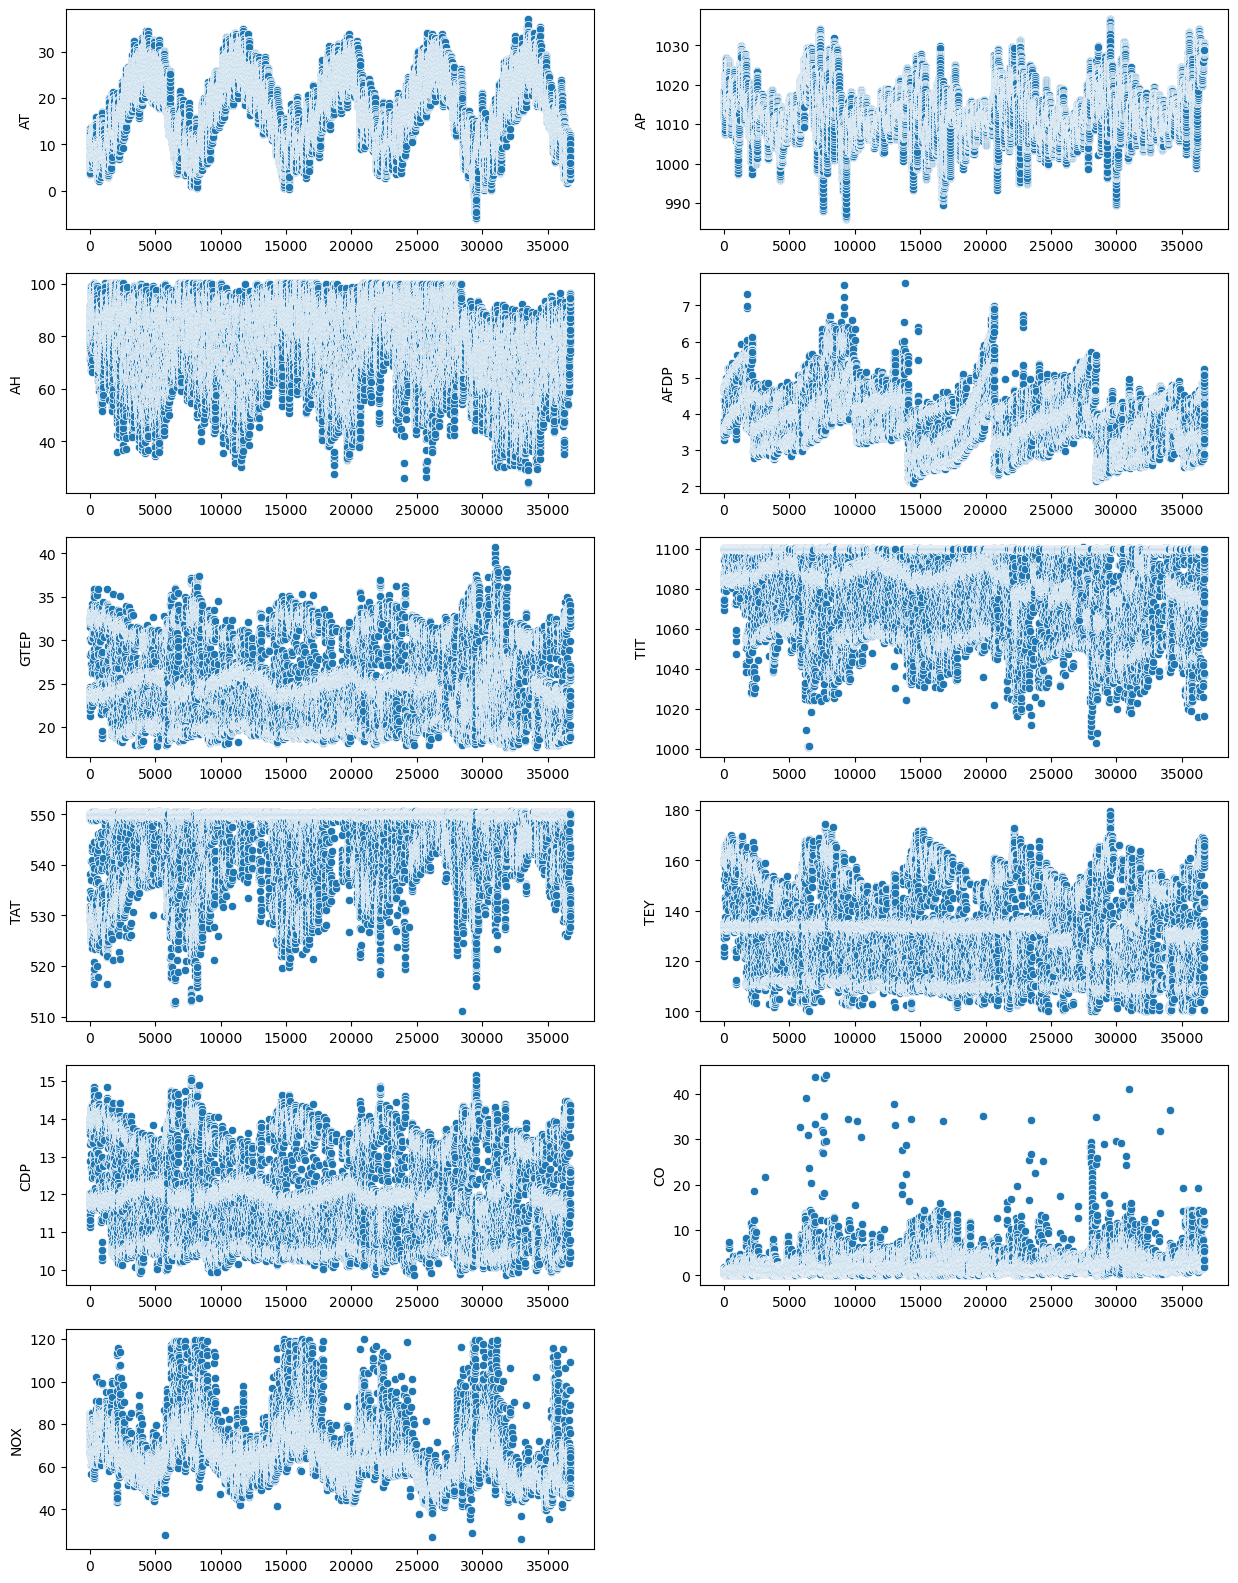

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,20))
for i,j in enumerate(raw_data.columns):
    plt.subplot(6,2,i+1)
    sns.scatterplot(raw_data, x=raw_data.index, y=raw_data[j])

There are negative values but they can not be interpreted as outliers at this stage. Also, as it can be seen from the scatter plots there are data point that can be suspected as of they are outliers.

<a id='common_proper_terminology_section'></a>
## 7. Common Proper Terminology

If there are different expressions that represent the same thing, then these different expressions are changed with only one common and proper expression. Thus, a common and proper terminology requirement in the dataset is satisfied.

In [21]:
# There is no feature that can be thought as if there is a typo

<a id='re_naming_section'></a>
## 8. Re-Name

There could be some removed rows and columns. Therefore, in order to keep integrity of the dataset, index and column numbers/names might need to change. Thus, re-indexing and column name arranging is made.

In [22]:
# There is no renaming or re_indexing process

<a id='format_section'></a>
## 9. Format

Data is cleaned so far. Hence, the dataset is stored with the proper file formatting in this section.

In [23]:
# The dataset hasn't changed. Therefore, original dataset remain the same.

---